<a href="https://colab.research.google.com/github/LuisFernandoCampos/modelo_renovacion_prestamo/blob/main/modelo_renovacion_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
rp=pd.read_csv("/content/renovacion_prestamo.csv", sep=";")

# 1.- ANALISIS EXPLORATORIO DE DATOS

In [ ]:
rp.head(2)

,MES,CLIENTE,LINEA_RENOVADO,PLAZO_RENOVADO,FLAG_VENTA,USO_LINEA_TOTAL_TC_T2,USO_TRIM_LINEA_BBVA,NR_ENTIDADES_TOTAL_T2,DIFF_NRO_ENTIDA_TOTALES_T2_T12,SDO_CONSUMO_T2,...,PConsumo_Sldo_Bco_T1,SDO_BCO_tot_sm_pasivo_Bco_6M,EDAD,SEXO,EST_CIVIL,ANTIGUEDAD_MES,REGION,FLAG_LIMA_PROVINCIA,SUELDO_ESTIMADO,CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD
0,201506,1,3770,12,0,0.0,0.0,1,-1,271.12,...,457,3754.333333,25.0,M,S,23.0,LIMA NORTE,1,3531.0,0.071915
1,201506,2,1300,6,0,0.0,0.0,1,0,11200.00,...,11200,1581.333333,33.0,M,S,56.0,LIMA ESTE,1,1322.0,8.615380


In [ ]:
rp["FLAG_VENTA"].value_counts()/len(rp)*100

0    96.011695
1     3.988305
Name: FLAG_VENTA, dtype: float64

In [ ]:
rp["CLIENTE"].count()

87556

In [ ]:
print("tamaño: ",rp.shape)

tamaño:  (87556, 22)


In [ ]:
rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87556 entries, 0 to 87555
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MES                                 87556 non-null  int64  
 1   CLIENTE                             87556 non-null  int64  
 2   LINEA_RENOVADO                      87556 non-null  int64  
 3   PLAZO_RENOVADO                      87556 non-null  int64  
 4   FLAG_VENTA                          87556 non-null  int64  
 5   USO_LINEA_TOTAL_TC_T2               68364 non-null  float64
 6   USO_TRIM_LINEA_BBVA                 68364 non-null  float64
 7   NR_ENTIDADES_TOTAL_T2               87556 non-null  int64  
 8   DIFF_NRO_ENTIDA_TOTALES_T2_T12      87556 non-null  int64  
 9   SDO_CONSUMO_T2                      82370 non-null  float64
 10  RESENCIA_OFERTA_PLD_RENOVADO        73700 non-null  float64
 11  Ahorro_Sldo_Bco_T1                  87556

In [ ]:
rp.isna().sum()

MES                                       0
CLIENTE                                   0
LINEA_RENOVADO                            0
PLAZO_RENOVADO                            0
FLAG_VENTA                                0
USO_LINEA_TOTAL_TC_T2                 19192
USO_TRIM_LINEA_BBVA                   19192
NR_ENTIDADES_TOTAL_T2                     0
DIFF_NRO_ENTIDA_TOTALES_T2_T12            0
SDO_CONSUMO_T2                         5186
RESENCIA_OFERTA_PLD_RENOVADO          13856
Ahorro_Sldo_Bco_T1                        0
PConsumo_Sldo_Bco_T1                      0
SDO_BCO_tot_sm_pasivo_Bco_6M              0
EDAD                                      1
SEXO                                      1
EST_CIVIL                                 1
ANTIGUEDAD_MES                            1
REGION                                   18
FLAG_LIMA_PROVINCIA                       0
SUELDO_ESTIMADO                          37
CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD        0
dtype: int64

In [ ]:
# Filtrar columnas con valores nulos
columnas_con_nulos = rp.columns[rp.isna().sum() > 0]
p50=lambda x: x.quantile(0.50)
p99=lambda x: x.quantile(0.99)
p95=lambda x: x.quantile(0.95)
coeficiente_variabilidad= (rp[columnas_con_nulos].std() / rp[columnas_con_nulos].mean())*100

<ipython-input-161-cc6be0556025>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  coeficiente_variabilidad= (rp[columnas_con_nulos].std() / rp[columnas_con_nulos].mean())*100
<ipython-input-161-cc6be0556025>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  coeficiente_variabilidad= (rp[columnas_con_nulos].std() / rp[columnas_con_nulos].mean())*100


In [ ]:
coeficiente_variabilidad.sort_values(ascending=False)

USO_TRIM_LINEA_BBVA             211.180842
SDO_CONSUMO_T2                  149.946500
USO_LINEA_TOTAL_TC_T2           149.463004
SUELDO_ESTIMADO                 125.966387
ANTIGUEDAD_MES                   60.225762
RESENCIA_OFERTA_PLD_RENOVADO     40.323096
EDAD                             24.697052
dtype: float64

In [ ]:
rp[columnas_con_nulos].agg(["mean", p50, "min", "max",p95,p99]).T


<ipython-input-163-62699aac1bf3>:1: FutureWarning: ['SEXO', 'EST_CIVIL', 'REGION'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  rp[columnas_con_nulos].agg(["mean", p50, "min", "max",p95,p99]).T


,mean,<lambda>,min,max,<lambda>,<lambda>
USO_LINEA_TOTAL_TC_T2,0.128593,0.030634,0.0,1.466976,0.556814,0.809457
USO_TRIM_LINEA_BBVA,0.096935,0.000000,0.0,1.666666,0.605864,0.900713
SDO_CONSUMO_T2,14385.172299,8368.145000,0.0,722781.090000,48501.905000,107020.912400
RESENCIA_OFERTA_PLD_RENOVADO,14.704464,15.000000,1.0,21.000000,21.000000,21.000000
EDAD,43.820753,43.000000,21.0,72.000000,62.000000,65.000000
ANTIGUEDAD_MES,124.336508,106.000000,3.0,561.000000,241.000000,294.000000
SUELDO_ESTIMADO,4766.287255,3178.120000,0.0,240909.000000,12746.300000,24750.000000


# 2.- PREPROCESAMIENTO

  # 2.1.- LIMPIEZA DE DATOS

# COLUMNAS NUMERICAS


**USO_LINEA_TOTAL_TC_T2**

<Axes: >

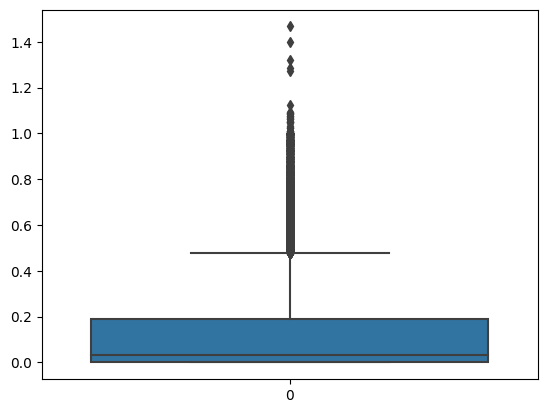

In [ ]:
sns.boxplot(rp["USO_LINEA_TOTAL_TC_T2"])

In [ ]:
# Calcular el límite superior del boxplot
q3 = rp["USO_LINEA_TOTAL_TC_T2"].quantile(0.75)
q1=rp["USO_LINEA_TOTAL_TC_T2"].quantile(0.25)
iqr = q3 - q1
limite_superior_1 = q3 + 1.5 * iqr
limite_superior_1

0.478155625

In [ ]:
# Remplazamos los outliers por el limite superior de su boxplot
rp["USO_LINEA_TOTAL_TC_T2_ls"]=rp["USO_LINEA_TOTAL_TC_T2"]
rp.loc[rp["USO_LINEA_TOTAL_TC_T2_ls"]>limite_superior_1,"USO_LINEA_TOTAL_TC_T2_ls"]=limite_superior_1

In [ ]:
media=rp["USO_LINEA_TOTAL_TC_T2_ls"].mean()
print("mean: ",media)
mediana=rp["USO_LINEA_TOTAL_TC_T2_ls"].median()
print("mediana: ", mediana)

mean:  0.11634711234165641
mediana:  0.0306335


In [ ]:

# Reemplaza los valores faltantes con la media
rp["USO_LINEA_TOTAL_TC_T2_ls"].fillna(media,inplace=True)

<Axes: xlabel='USO_LINEA_TOTAL_TC_T2', ylabel='Count'>

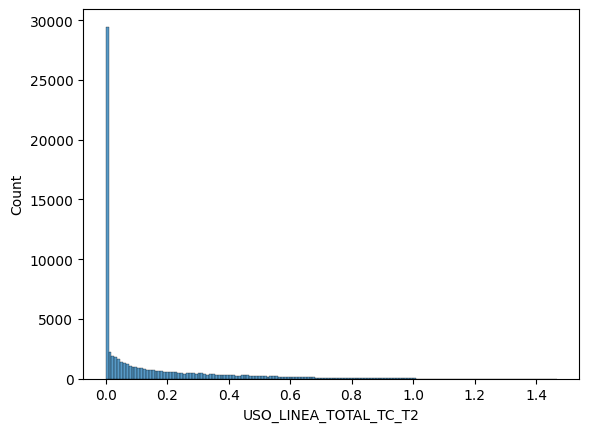

In [ ]:
sns.histplot(rp["USO_LINEA_TOTAL_TC_T2"])

<Axes: xlabel='USO_LINEA_TOTAL_TC_T2_ls', ylabel='Count'>

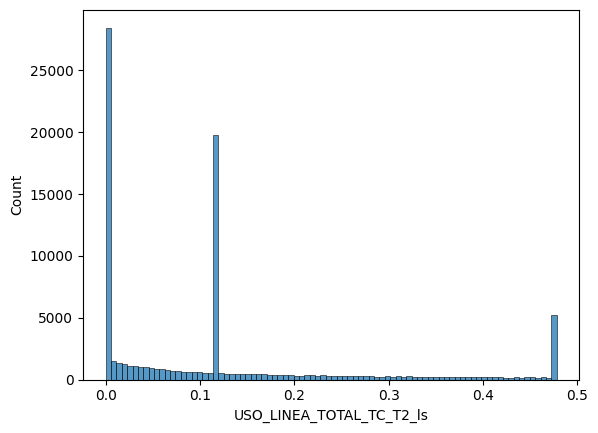

In [ ]:
sns.histplot(rp["USO_LINEA_TOTAL_TC_T2_ls"]) #bins=5, color='orange'

<Axes: xlabel='USO_LINEA_TOTAL_TC_T2', ylabel='Density'>

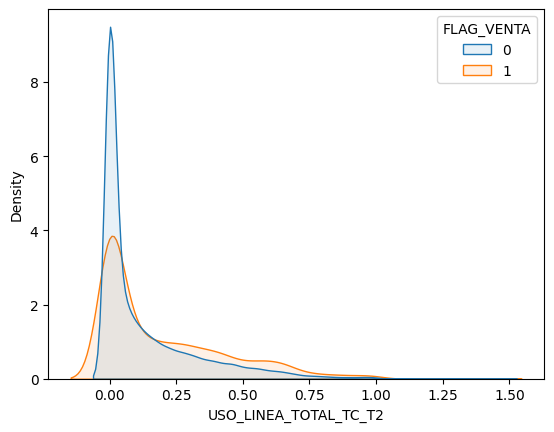

In [ ]:
sns.kdeplot(rp, x="USO_LINEA_TOTAL_TC_T2",hue="FLAG_VENTA",fill=True,common_norm=False,alpha=0.1)

**USO_TRIM_LINEA_BBVA**

In [ ]:
# Calcular el límite superior del boxplot
q3 = rp["USO_TRIM_LINEA_BBVA"].quantile(0.75)
q1=rp["USO_TRIM_LINEA_BBVA"].quantile(0.25)
iqr = q3 - q1
limite_superior_2 = q3 + 1.5 * iqr
limite_superior_2

0.17281250000000004

In [ ]:
# Remplazamos los outliers por el limite superior de su boxplot
rp["USO_TRIM_LINEA_BBVA_ls"]=rp["USO_TRIM_LINEA_BBVA"]
rp.loc[rp["USO_TRIM_LINEA_BBVA_ls"]>limite_superior_2,"USO_TRIM_LINEA_BBVA_ls"]=limite_superior_2

In [ ]:
media=rp["USO_TRIM_LINEA_BBVA_ls"].mean()
print("mean: ",media)
mediana=rp["USO_TRIM_LINEA_BBVA_ls"].median()
print("mediana: ", mediana)

mean:  0.04199524512170149
mediana:  0.0


In [ ]:

# Reemplaza los valores faltantes con la media
rp["USO_TRIM_LINEA_BBVA_ls"].fillna(media,inplace=True)

**SDO_CONSUMO_T2**

In [ ]:
# Calcular el límite superior del boxplot
q3 = rp["SDO_CONSUMO_T2"].quantile(0.75)
q1=rp["SDO_CONSUMO_T2"].quantile(0.25)
iqr = q3 - q1
limite_superior_3 = q3 + 1.5 * iqr
limite_superior_3

33311.99249999999

In [ ]:
# Remplazamos los outliers por el limite superior de su boxplot
rp["SDO_CONSUMO_T2_ls"]=rp["SDO_CONSUMO_T2"]
rp.loc[rp["SDO_CONSUMO_T2_ls"]>limite_superior_3,"SDO_CONSUMO_T2_ls"]=limite_superior_3

In [ ]:
media=rp["SDO_CONSUMO_T2_ls"].mean()
print("mean: ",media)
mediana=rp["SDO_CONSUMO_T2_ls"].median()
print("mediana: ", mediana)

mean:  11493.351276435595
mediana:  8368.145


In [ ]:
# Reemplaza los valores faltantes con la media
rp["SDO_CONSUMO_T2_ls"].fillna(media,inplace=True)

**ANTIGUEDAD_MES**

In [ ]:
# Calcular el límite superior del boxplot
q3 = rp["ANTIGUEDAD_MES"].quantile(0.75)
q1=rp["ANTIGUEDAD_MES"].quantile(0.25)
iqr = q3 - q1
limite_superior_4 = q3 + 1.5 * iqr
limite_superior_4

384.0

In [ ]:
# Remplazamos los outliers por el limite superior de su boxplot
rp["ANTIGUEDAD_MES_ls"]=rp["ANTIGUEDAD_MES"]
rp.loc[rp["ANTIGUEDAD_MES_ls"]>limite_superior_4,"ANTIGUEDAD_MES_ls"]=limite_superior_4

In [ ]:
media=rp["ANTIGUEDAD_MES_ls"].mean()
print("mean: ",media)
mediana=rp["ANTIGUEDAD_MES_ls"].median()
print("mediana: ", mediana)

mean:  124.29818970932557
mediana:  106.0


In [ ]:
# Reemplaza los valores faltantes con la media
rp["ANTIGUEDAD_MES_ls"].fillna(media,inplace=True)

**SUELDO_ESTIMADO**

In [ ]:
# Calcular el límite superior del boxplot
q3 = rp["SUELDO_ESTIMADO"].quantile(0.75)
q1=rp["SUELDO_ESTIMADO"].quantile(0.25)
iqr = q3 - q1
limite_superior_5 = q3 + 1.5 * iqr
limite_superior_5

10722.265

In [ ]:
# Remplazamos los outliers por el limite superior de su boxplot
rp["SUELDO_ESTIMADO_ls"]=rp["SUELDO_ESTIMADO"]
rp.loc[rp["SUELDO_ESTIMADO_ls"]>limite_superior_5,"SUELDO_ESTIMADO_ls"]=limite_superior_5

In [ ]:
media=rp["SUELDO_ESTIMADO_ls"].mean()
print("mean: ",media)
mediana=rp["SUELDO_ESTIMADO_ls"].median()
print("mediana: ", mediana)

mean:  4187.895008032541
mediana:  3178.12


In [ ]:
# Reemplaza los valores faltantes con la media
rp["SUELDO_ESTIMADO_ls"].fillna(media,inplace=True)

**RESENCIA_OFERTA_PLD_RENOVADO**

In [ ]:
# Su coefeciente de variabilidad es menor al 50%

media=rp["RESENCIA_OFERTA_PLD_RENOVADO"].mean()
rp["RESENCIA_OFERTA_PLD_RENOVADO_ls"]=rp["RESENCIA_OFERTA_PLD_RENOVADO"]
rp["RESENCIA_OFERTA_PLD_RENOVADO_ls"].fillna(media,inplace=True)

**EDAD**

In [ ]:
# Su coefeciente de variabilidad es menor al 50%

media=rp["EDAD"].mean()
rp["EDAD_ls"]=rp["EDAD"]
rp["EDAD_ls"].fillna(media,inplace=True)

In [ ]:
rp.isna().sum()

MES                                       0
CLIENTE                                   0
LINEA_RENOVADO                            0
PLAZO_RENOVADO                            0
FLAG_VENTA                                0
USO_LINEA_TOTAL_TC_T2                 19192
USO_TRIM_LINEA_BBVA                   19192
NR_ENTIDADES_TOTAL_T2                     0
DIFF_NRO_ENTIDA_TOTALES_T2_T12            0
SDO_CONSUMO_T2                         5186
RESENCIA_OFERTA_PLD_RENOVADO          13856
Ahorro_Sldo_Bco_T1                        0
PConsumo_Sldo_Bco_T1                      0
SDO_BCO_tot_sm_pasivo_Bco_6M              0
EDAD                                      1
SEXO                                      1
EST_CIVIL                                 1
ANTIGUEDAD_MES                            1
REGION                                   18
FLAG_LIMA_PROVINCIA                       0
SUELDO_ESTIMADO                          37
CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD        0
USO_LINEA_TOTAL_TC_T2_ls        

# COLUMNAS CATEGORICAS

**sexo**

In [ ]:
rp["SEXO_ls"] = rp["SEXO"]
rp.dropna(subset=["SEXO_ls"], inplace=True)
print(rp["SEXO_ls"].isna().sum())

0


**EST_CIVIL**

In [ ]:
rp["EST_CIVIL_ls"] = rp["EST_CIVIL"]
rp.dropna(subset=["EST_CIVIL_ls"], inplace=True)
print(rp["EST_CIVIL_ls"].isna().sum())

0


**REGION**

In [ ]:
rp["REGION_ls"] = rp["REGION"]
rp.dropna(subset=["REGION_ls"], inplace=True)
print(rp["REGION_ls"].isna().sum())

0


In [ ]:
rp.isna().sum()

MES                                       0
CLIENTE                                   0
LINEA_RENOVADO                            0
PLAZO_RENOVADO                            0
FLAG_VENTA                                0
USO_LINEA_TOTAL_TC_T2                 19189
USO_TRIM_LINEA_BBVA                   19189
NR_ENTIDADES_TOTAL_T2                     0
DIFF_NRO_ENTIDA_TOTALES_T2_T12            0
SDO_CONSUMO_T2                         5186
RESENCIA_OFERTA_PLD_RENOVADO          13855
Ahorro_Sldo_Bco_T1                        0
PConsumo_Sldo_Bco_T1                      0
SDO_BCO_tot_sm_pasivo_Bco_6M              0
EDAD                                      0
SEXO                                      0
EST_CIVIL                                 0
ANTIGUEDAD_MES                            0
REGION                                    0
FLAG_LIMA_PROVINCIA                       0
SUELDO_ESTIMADO                          37
CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD        0
USO_LINEA_TOTAL_TC_T2_ls        

# GUARDAR COLUMNAS LIMPIAS

In [ ]:
rp.columns

Index(['MES', 'CLIENTE', 'LINEA_RENOVADO', 'PLAZO_RENOVADO', 'FLAG_VENTA',
       'USO_LINEA_TOTAL_TC_T2', 'USO_TRIM_LINEA_BBVA', 'NR_ENTIDADES_TOTAL_T2',
       'DIFF_NRO_ENTIDA_TOTALES_T2_T12', 'SDO_CONSUMO_T2',
       'RESENCIA_OFERTA_PLD_RENOVADO', 'Ahorro_Sldo_Bco_T1',
       'PConsumo_Sldo_Bco_T1', 'SDO_BCO_tot_sm_pasivo_Bco_6M', 'EDAD', 'SEXO',
       'EST_CIVIL', 'ANTIGUEDAD_MES', 'REGION', 'FLAG_LIMA_PROVINCIA',
       'SUELDO_ESTIMADO', 'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD',
       'USO_LINEA_TOTAL_TC_T2_ls', 'USO_TRIM_LINEA_BBVA_ls',
       'SDO_CONSUMO_T2_ls', 'ANTIGUEDAD_MES_ls', 'SUELDO_ESTIMADO_ls',
       'RESENCIA_OFERTA_PLD_RENOVADO_ls', 'EDAD_ls', 'SEXO_ls', 'EST_CIVIL_ls',
       'REGION_ls'],
      dtype='object')

In [ ]:
columnas_limp=['MES', 'CLIENTE', 'LINEA_RENOVADO', 'PLAZO_RENOVADO', 'FLAG_VENTA',
               'NR_ENTIDADES_TOTAL_T2','DIFF_NRO_ENTIDA_TOTALES_T2_T12', 'Ahorro_Sldo_Bco_T1',
               'PConsumo_Sldo_Bco_T1', 'SDO_BCO_tot_sm_pasivo_Bco_6M', 'FLAG_LIMA_PROVINCIA', 'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD',
               'USO_LINEA_TOTAL_TC_T2_ls', 'USO_TRIM_LINEA_BBVA_ls','SDO_CONSUMO_T2_ls',
               'ANTIGUEDAD_MES_ls', 'SUELDO_ESTIMADO_ls','RESENCIA_OFERTA_PLD_RENOVADO_ls', 'EDAD_ls',
               'SEXO_ls','EST_CIVIL_ls','REGION_ls']

In [ ]:
rp2=rp[columnas_limp]

In [ ]:
rp2.to_excel('rp2.xlsx', index=False)

# 2.2.- TRANSFORMACION DE DATOS

In [ ]:
rp_=pd.read_excel("/content/rp2.xlsx")

In [ ]:
le = LabelEncoder()

rp_["SEXO_ls"] = le.fit_transform(rp_["SEXO_ls"])
rp_["EST_CIVIL_ls"] = le.fit_transform(rp_["EST_CIVIL_ls"])
rp_["REGION_ls"] = le.fit_transform(rp_["REGION_ls"])

rp_.head()

,MES,CLIENTE,LINEA_RENOVADO,PLAZO_RENOVADO,FLAG_VENTA,NR_ENTIDADES_TOTAL_T2,DIFF_NRO_ENTIDA_TOTALES_T2_T12,Ahorro_Sldo_Bco_T1,PConsumo_Sldo_Bco_T1,SDO_BCO_tot_sm_pasivo_Bco_6M,...,USO_LINEA_TOTAL_TC_T2_ls,USO_TRIM_LINEA_BBVA_ls,SDO_CONSUMO_T2_ls,ANTIGUEDAD_MES_ls,SUELDO_ESTIMADO_ls,RESENCIA_OFERTA_PLD_RENOVADO_ls,EDAD_ls,SEXO_ls,EST_CIVIL_ls,REGION_ls
0,201506,1,3770,12,0,1,-1,1850,457,3754.333333,...,0.000000,0.000000,271.12,23,3531.0,21.000000,25,1,2,6
1,201506,2,1300,6,0,1,0,2093,11200,1581.333333,...,0.000000,0.000000,11200.00,56,1322.0,9.000000,33,1,2,4
2,201506,3,7800,36,0,5,-2,16208,4778,10241.000000,...,0.429507,0.172813,20156.45,20,4234.0,14.704464,26,1,2,5
3,201506,4,6630,12,0,1,1,1531,0,5797.333333,...,0.000000,0.000000,20485.14,166,6647.0,20.000000,51,1,2,9
4,201506,5,15497,36,1,1,0,308,1935,16755.333330,...,0.116347,0.041995,1682.83,55,2094.0,11.000000,35,1,0,9


In [ ]:
rp_["MES"].unique()

array([201506, 201505, 201507, 201508, 201509, 201504, 201503, 201502,
       201501])

In [ ]:
rp_["MES"].dtype

dtype('int64')

In [ ]:
# Convertir a cadena para usar "str"
rp_["MES"] = rp_["MES"].astype(str)

# Extraer el ultimo valor
rp_["MES"]=rp_["MES"].str[5:]

In [ ]:
rp_["MES"].unique()

array(['6', '5', '7', '8', '9', '4', '3', '2', '1'], dtype=object)

In [ ]:
rp_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87538 entries, 0 to 87537
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MES                                 87538 non-null  object 
 1   CLIENTE                             87538 non-null  int64  
 2   LINEA_RENOVADO                      87538 non-null  int64  
 3   PLAZO_RENOVADO                      87538 non-null  int64  
 4   FLAG_VENTA                          87538 non-null  int64  
 5   NR_ENTIDADES_TOTAL_T2               87538 non-null  int64  
 6   DIFF_NRO_ENTIDA_TOTALES_T2_T12      87538 non-null  int64  
 7   Ahorro_Sldo_Bco_T1                  87538 non-null  int64  
 8   PConsumo_Sldo_Bco_T1                87538 non-null  int64  
 9   SDO_BCO_tot_sm_pasivo_Bco_6M        87538 non-null  float64
 10  FLAG_LIMA_PROVINCIA                 87538 non-null  int64  
 11  CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD  87538

In [ ]:
# Asegurarse que todas las columnas sean numericas
rp_["MES"] = rp_["MES"].astype(int)
rp_["MES"].dtype

dtype('int64')

In [ ]:
rp_.head(2)

,MES,CLIENTE,LINEA_RENOVADO,PLAZO_RENOVADO,FLAG_VENTA,NR_ENTIDADES_TOTAL_T2,DIFF_NRO_ENTIDA_TOTALES_T2_T12,Ahorro_Sldo_Bco_T1,PConsumo_Sldo_Bco_T1,SDO_BCO_tot_sm_pasivo_Bco_6M,...,USO_LINEA_TOTAL_TC_T2_ls,USO_TRIM_LINEA_BBVA_ls,SDO_CONSUMO_T2_ls,ANTIGUEDAD_MES_ls,SUELDO_ESTIMADO_ls,RESENCIA_OFERTA_PLD_RENOVADO_ls,EDAD_ls,SEXO_ls,EST_CIVIL_ls,REGION_ls
0,6,1,3770,12,0,1,-1,1850,457,3754.333333,...,0.0,0.0,271.12,23,3531.0,21.0,25,1,2,6
1,6,2,1300,6,0,1,0,2093,11200,1581.333333,...,0.0,0.0,11200.00,56,1322.0,9.0,33,1,2,4


In [ ]:
rp_.columns

Index(['MES', 'CLIENTE', 'LINEA_RENOVADO', 'PLAZO_RENOVADO', 'FLAG_VENTA',
       'NR_ENTIDADES_TOTAL_T2', 'DIFF_NRO_ENTIDA_TOTALES_T2_T12',
       'Ahorro_Sldo_Bco_T1', 'PConsumo_Sldo_Bco_T1',
       'SDO_BCO_tot_sm_pasivo_Bco_6M', 'FLAG_LIMA_PROVINCIA',
       'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD', 'USO_LINEA_TOTAL_TC_T2_ls',
       'USO_TRIM_LINEA_BBVA_ls', 'SDO_CONSUMO_T2_ls', 'ANTIGUEDAD_MES_ls',
       'SUELDO_ESTIMADO_ls', 'RESENCIA_OFERTA_PLD_RENOVADO_ls', 'EDAD_ls',
       'SEXO_ls', 'EST_CIVIL_ls', 'REGION_ls'],
      dtype='object')

In [ ]:
columnas=['MES', 'LINEA_RENOVADO', 'PLAZO_RENOVADO', 'FLAG_VENTA',
       'NR_ENTIDADES_TOTAL_T2', 'DIFF_NRO_ENTIDA_TOTALES_T2_T12',
       'Ahorro_Sldo_Bco_T1', 'PConsumo_Sldo_Bco_T1',
       'SDO_BCO_tot_sm_pasivo_Bco_6M', 'FLAG_LIMA_PROVINCIA',
       'CUBRIR_DEUDA_CONSUMO_SF_RENOVA_PLD', 'USO_LINEA_TOTAL_TC_T2_ls',
       'USO_TRIM_LINEA_BBVA_ls', 'SDO_CONSUMO_T2_ls', 'ANTIGUEDAD_MES_ls',
       'SUELDO_ESTIMADO_ls', 'RESENCIA_OFERTA_PLD_RENOVADO_ls', 'EDAD_ls',
       'SEXO_ls', 'EST_CIVIL_ls', 'REGION_ls']

In [ ]:
rp_ml=rp_[columnas]

In [ ]:
rp_ml

,MES,LINEA_RENOVADO,PLAZO_RENOVADO,FLAG_VENTA,NR_ENTIDADES_TOTAL_T2,DIFF_NRO_ENTIDA_TOTALES_T2_T12,Ahorro_Sldo_Bco_T1,PConsumo_Sldo_Bco_T1,SDO_BCO_tot_sm_pasivo_Bco_6M,FLAG_LIMA_PROVINCIA,...,USO_LINEA_TOTAL_TC_T2_ls,USO_TRIM_LINEA_BBVA_ls,SDO_CONSUMO_T2_ls,ANTIGUEDAD_MES_ls,SUELDO_ESTIMADO_ls,RESENCIA_OFERTA_PLD_RENOVADO_ls,EDAD_ls,SEXO_ls,EST_CIVIL_ls,REGION_ls
0,6,3770,12,0,1,-1,1850,457,3754.333333,1,...,0.000000,0.000000,271.12,23,3531.000,21.000000,25,1,2,6
1,6,1300,6,0,1,0,2093,11200,1581.333333,1,...,0.000000,0.000000,11200.00,56,1322.000,9.000000,33,1,2,4
2,6,7800,36,0,5,-2,16208,4778,10241.000000,1,...,0.429507,0.172813,20156.45,20,4234.000,14.704464,26,1,2,5
3,6,6630,12,0,1,1,1531,0,5797.333333,0,...,0.000000,0.000000,20485.14,166,6647.000,20.000000,51,1,2,9
4,6,15497,36,1,1,0,308,1935,16755.333330,0,...,0.116347,0.041995,1682.83,55,2094.000,11.000000,35,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87533,8,32500,36,0,1,0,3110,35820,6914.000000,1,...,0.225158,0.172813,20450.26,43,3277.000,15.000000,25,1,2,6
87534,7,19500,18,0,3,-1,1705,11880,5740.333333,1,...,0.133990,0.096868,22128.11,203,9804.000,14.704464,48,1,0,6
87535,6,20800,24,0,2,0,579,12688,1717.166666,1,...,0.116347,0.041995,0.00,149,10722.265,14.704464,35,0,0,5
87536,8,22816,36,0,1,0,36,33950,291.750000,0,...,0.015731,0.084942,16716.47,33,1500.000,14.704464,40,1,2,12


In [ ]:
rp_ml.to_excel('rp_ml.xlsx', index=False)

# 3.- DIVISION DE DATOS PARA ENTRENAMIENTO Y PRUEBAS

In [3]:
rp_ml=pd.read_excel("/content/rp_ml.xlsx")
rp_ml

,MES,LINEA_RENOVADO,PLAZO_RENOVADO,FLAG_VENTA,NR_ENTIDADES_TOTAL_T2,DIFF_NRO_ENTIDA_TOTALES_T2_T12,Ahorro_Sldo_Bco_T1,PConsumo_Sldo_Bco_T1,SDO_BCO_tot_sm_pasivo_Bco_6M,FLAG_LIMA_PROVINCIA,...,USO_LINEA_TOTAL_TC_T2_ls,USO_TRIM_LINEA_BBVA_ls,SDO_CONSUMO_T2_ls,ANTIGUEDAD_MES_ls,SUELDO_ESTIMADO_ls,RESENCIA_OFERTA_PLD_RENOVADO_ls,EDAD_ls,SEXO_ls,EST_CIVIL_ls,REGION_ls
0,6,3770,12,0,1,-1,1850,457,3754.333333,1,...,0.000000,0.000000,271.12,23,3531.000,21.000000,25,1,2,6
1,6,1300,6,0,1,0,2093,11200,1581.333333,1,...,0.000000,0.000000,11200.00,56,1322.000,9.000000,33,1,2,4
2,6,7800,36,0,5,-2,16208,4778,10241.000000,1,...,0.429507,0.172813,20156.45,20,4234.000,14.704464,26,1,2,5
3,6,6630,12,0,1,1,1531,0,5797.333333,0,...,0.000000,0.000000,20485.14,166,6647.000,20.000000,51,1,2,9
4,6,15497,36,1,1,0,308,1935,16755.333330,0,...,0.116347,0.041995,1682.83,55,2094.000,11.000000,35,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87533,8,32500,36,0,1,0,3110,35820,6914.000000,1,...,0.225158,0.172813,20450.26,43,3277.000,15.000000,25,1,2,6
87534,7,19500,18,0,3,-1,1705,11880,5740.333333,1,...,0.133990,0.096868,22128.11,203,9804.000,14.704464,48,1,0,6
87535,6,20800,24,0,2,0,579,12688,1717.166666,1,...,0.116347,0.041995,0.00,149,10722.265,14.704464,35,0,0,5
87536,8,22816,36,0,1,0,36,33950,291.750000,0,...,0.015731,0.084942,16716.47,33,1500.000,14.704464,40,1,2,12


In [5]:
X = rp_ml.drop("FLAG_VENTA", axis=1)
y = rp_ml["FLAG_VENTA"]

In [6]:
rp_ml["FLAG_VENTA"].value_counts()

0    84048
1     3490
Name: FLAG_VENTA, dtype: int64

In [7]:
# Nuestros datos estan desequilibrados, aplicamos la tecnica de muestreo "oversampling"
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
y_over.value_counts()

0    84048
1    84048
Name: FLAG_VENTA, dtype: int64

In [8]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# 4.- PREPARAR, ENTRENAR Y EVALUAR EL MODELO

In [14]:
# Importamos el clsificador
gbc = GradientBoostingClassifier(random_state=42)

# Entrena el modelo en el conjunto de entrenamiento
gbc.fit(X_train, y_train)

print("accuracy on training set: ", gbc.score(X_train, y_train))
print("accuracy on test set: ", gbc.score(X_test, y_test))

accuracy on training set:  0.6710119277789345
accuracy on test set:  0.6665675193337299


In [16]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[10869,  5810],
       [ 5400, 11541]])

In [17]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, gbc.predict(X_test)))
print("Sensitivity_recall: ", metrics.recall_score(y_test, gbc.predict(X_test)))
print("Precision: ", metrics.precision_score(y_test, gbc.predict(X_test)))
print("F1_score: ", metrics.f1_score(y_test, gbc.predict(X_test)))

Accuracy:  0.6665675193337299
Sensitivity_recall:  0.6812466796529131
Precision:  0.6651489827675638
F1_score:  0.6731015980403593
